 #  <font color='#7E9BC0'> **Movies Recommendation | movielens.org.** </font>

<b> </h4> **Data Cleaning Movies Recommendation | movielens.org** </b> 
</div>

<b> **Autors:**</b> 
Juan Pablo López Salazar, Bryan Urra Calfuñir.  
</div>

<b> **Data Source:**</b> 
F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4: 19:1–19:19. <https://doi.org/10.1145/2827872>
</div>

# **Libreries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
import numpy as np

# **Importing Data**

In [2]:
df=pd.read_csv("Data Cleaning/df.csv")
df

Unnamed: 0  movieId                     title  year  Musical  \
0                  0        1          Toy Story (1995)  1995        0   
1                  1        1          Toy Story (1995)  1995        0   
2                  2        1          Toy Story (1995)  1995        0   
3                  3        1          Toy Story (1995)  1995        0   
4                  4        1          Toy Story (1995)  1995        0   
...              ...      ...                       ...   ...      ...   
21363023    21363023   192283  Crazy Rich Asians (2018)  2018        0   
21363024    21363024   192283  Crazy Rich Asians (2018)  2018        0   
21363025    21363025   192283  Crazy Rich Asians (2018)  2018        0   
21363026    21363026   192283  Crazy Rich Asians (2018)  2018        0   
21363027    21363027   192283  Crazy Rich Asians (2018)  2018        0   

          (no genres listed)  Horror  War  Mystery  Western  ...  Fantasy  \
0                          0       0    0        0        0  ...        1   
1                          0       0    0        0        0  ...        1   
2                          0       0    0        0        0  ...        1   
3                          0       0    0        0        0  ...        1   
4                          0       0    0        0        0  ...        1   
...                      ...     ...  ...      ...      ...  ...      ...   
21363023                   0       0    0        0        0  ...        0   
21363024                   0       0    0        0        0  ...        0   
21363025                   0       0    0        0        0  ...        0   
21363026                   0       0    0        0        0  ...        0   
21363027                   0       0    0        0        0  ...        0   

          Children  Romance  Adventure  Sci-Fi  Crime  Documentary  IMAX  \
0                1        0          1       0      0            0     0   
1                1        0          1       0      0            0     0   
2                1        0          1       0      0            0     0   
3                1        0          1       0      0            0     0   
4                1        0          1       0      0            0     0   
...            ...      ...        ...     ...    ...          ...   ...   
21363023         0        0          0       0      0            0     0   
21363024         0        0          0       0      0            0     0   
21363025         0        0          0       0      0            0     0   
21363026         0        0          0       0      0            0     0   
21363027         0        0          0       0      0            0     0   

          userId  rating  
0              4     4.0  
1             10     5.0  
2             14     4.5  
3             15     4.0  
4             22     4.0  
...          ...     ...  
21363023  261224     3.5  
21363024  261870     0.5  
21363025  266861     3.5  
21363026  275841     3.0  
21363027  277968     3.5  

[21363028 rows x 26 columns]

# **Algorithm 1: Popularity**

IMDB uses this a formula to determinate the popularity of a movie, which is: 
    
*Weighted Rating (WR)* = $(\frac{v}{v + m} . R) + (\frac{m}{v + m} . C)$

Consider:
* *v* number of rates
* *m* minimum rates to could be consider
* *R* average rating of the movie
* *C* average rating of all the movies


In [ ]:
rat_orig = pd.read_csv("Data Cleaning/ratings.csv")
movies = pd.read_csv("Data Cleaning/movies.csv",index_col=0)

In [ ]:
C=rat_orig['rating'].mean()
rating_prom=rat_orig.groupby('movieId')['rating'].agg([len,np.mean])
m=rating_prom['len'].quantile(0.75)
rating_prom=rating_prom[rating_prom['len']>m]
rating_prom['Title']=movies['title'][rating_prom.index]
rating_prom['Weighted Rating']=(rating_prom['len']*rating_prom['mean']+m*C)/(m+rating_prom['len'])
rating_prom=rating_prom.sort_values(by='Weighted Rating',ascending=False)
rating_prom[['Title','Weighted Rating','len','mean']].head(10)

Title  Weighted Rating      len  \
movieId                                                                      
171011                    Planet Earth II (2016)         4.435584    853.0   
159817                       Planet Earth (2006)         4.426998   1384.0   
318             Shawshank Redemption, The (1994)         4.423750  97999.0   
170705                   Band of Brothers (2001)         4.359459    984.0   
858                        Godfather, The (1972)         4.332261  60904.0   
174053      Black Mirror: White Christmas (2014)         4.315474   1074.0   
50                    Usual Suspects, The (1995)         4.291371  62180.0   
1221              Godfather: Part II, The (1974)         4.262132  38875.0   
527                      Schindler's List (1993)         4.257014  71516.0   
172591   The Godfather Trilogy: 1972-1990 (1992)         4.256847    421.0   

             mean  
movieId            
171011   4.486518  
159817   4.458092  
318      4.424188  
170705   4.399898  
858      4.332893  
174053   4.350559  
50       4.291959  
1221     4.263035  
527      4.257502  
172591   4.339667

Let's try to modify the mimimum rate

In [ ]:
C=rat_orig['rating'].mean()
rating_prom=rat_orig.groupby('movieId')['rating'].agg([len,np.mean])
m=rating_prom['len'].quantile(0.95)
rating_prom=rating_prom[rating_prom['len']>m]
rating_prom['Title']=movies['title'][rating_prom.index]
rating_prom['Weighted Rating']=(rating_prom['len']*rating_prom['mean']+m*C)/(m+rating_prom['len'])
rating_prom=rating_prom.sort_values(by='Weighted Rating',ascending=False)
rating_prom[['Title','Weighted Rating','len','mean']].head(10)

Title  Weighted Rating  \
movieId                                                                 
318                 Shawshank Redemption, The (1994)         4.407585   
858                            Godfather, The (1972)         4.309174   
50                        Usual Suspects, The (1995)         4.269899   
527                          Schindler's List (1993)         4.239120   
1221                  Godfather: Part II, The (1974)         4.229670   
2959                               Fight Club (1999)         4.211430   
1193          One Flew Over the Cuckoo's Nest (1975)         4.193750   
904                               Rear Window (1954)         4.176934   
2019     Seven Samurai (Shichinin no samurai) (1954)         4.172426   
912                                Casablanca (1942)         4.171835   

             len      mean  
movieId                     
318      97999.0  4.424188  
858      60904.0  4.332893  
50       62180.0  4.291959  
527      71516.0  4.257502  
1221     38875.0  4.263035  
2959     65678.0  4.230663  
1193     42181.0  4.222920  
904      22264.0  4.230799  
2019     14578.0  4.254116  
912      31095.0  4.210098

This model generate different rating according to the minimum number of rates considered. This may be a problem, as well that the result isn't personalized to the user

# **Algorithm 2: Machine Learning ALS**

## Librerias Pyspark

In [2]:
import os
os.environ['SPARK_HOME'] = "C:\Program Files\spark-3.1.2-bin-hadoop2.7"

In [3]:
import findspark 
findspark.init()
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.ml.tuning import TrainValidationSplit, ParamGridBuilder
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark.sql import SparkSession

In [4]:
spark = SparkSession.builder.appName('Recommendation System').master('local[*]').config('spark.driver.memory','12G').config('spark.ui.showConsoleProgress', True).config("spark.driver.maxResultSize", "4g").getOrCreate()

CreateSpark Data Frame

In [5]:
#Use these codes in case that you want to import the data direct using pyspark
sdf = spark.read.csv('Data Cleaning/df.csv',header=True, inferSchema='True')
#This code create a spark datafram from the original DF
#sparkDf = spark.createDataFrame(df)
#sparkDf.show()

## **Training Model**

In [6]:
train, test = sdf.randomSplit([0.75,0.25])

als=ALS(userCol="userId", itemCol="movieId", ratingCol="rating", coldStartStrategy="drop", nonnegative=True)
param_grid= ParamGridBuilder()\
            .addGrid(als.rank, [12,13,14])\
            .addGrid(als.maxIter, [18,19,20])\
            .addGrid(als.regParam, [.15,.16,.17])\
            .build()
evaluator=RegressionEvaluator(metricName="rmse", labelCol="rating", predictionCol="prediction")

tvs= TrainValidationSplit(
    estimator=als,
    estimatorParamMaps=param_grid,
    evaluator=evaluator)

model=tvs.fit(train)
# check https://www.kaggle.com/vchulski/tutorial-collaborative-filtering-with-pyspark

## Chosing best Model

In [7]:
best_model=model.bestModel

predictions=best_model.transform(test)
rmse=evaluator.evaluate(predictions)

print("RMSE = "+str(rmse))
print("*Best Model*")
print(" Rank: ", best_model.rank)
print(" MaxIter: ", best_model._java_obj.parent().getMaxIter())
print(" RegParam: ", best_model._java_obj.parent().getRegParam())

RMSE = 0.8278777605933034
*Best Model*
 Rank:  12
 MaxIter:  20
 RegParam:  0.15


## **Predicting**

In [8]:
import pandas as pd
My_own_rates=[{'userId':30000,'movieId':1,'rating':5},
              {'userId':30000,'movieId':152017,'rating':5},
              {'userId':30000,'movieId':5378,'rating':5},
              {'userId':30000,'movieId':66097,'rating':1},
              {'userId':30000,'movieId':2324,'rating':5},
              {'userId':30000,'movieId':136864,'rating':2},
              {'userId':30000,'movieId':8533,'rating':5},
              {'userId':40001,'movieId':72998,'rating':5},
              {'userId':40001,'movieId':5378,'rating':5},
              {'userId':40001,'movieId':106002,'rating':5},
              {'userId':40001,'movieId':175303,'rating':5},
              {'userId':40001,'movieId':176371,'rating':1},
              {'userId':40001,'movieId':175197,'rating':3},
              {'userId':50001,'movieId':7293,'rating':4},
              {'userId':50001,'movieId':102716,'rating':5},
              {'userId':50001,'movieId':117176,'rating':5},
              {'userId':50001,'movieId':5218,'rating':4},
              {'userId':60001,'movieId':2571,'rating':5},
              {'userId':60001,'movieId':73017,'rating':5},
              {'userId':60001,'movieId':6539,'rating':5},
              {'userId':60001,'movieId':91630,'rating':5}
              ]
testing = spark.createDataFrame(My_own_rates)
print(testing.schema)

StructType(List(StructField(movieId,LongType,true),StructField(rating,LongType,true),StructField(userId,LongType,true)))


## Transformar muestra de prueba a Spark Data Frame

## Recomendation from the sample

In [9]:
n=5
recommendations = best_model.recommendForUserSubset(testing,n)

## Recomendaciones a usuarios de prueba

In [14]:
recommendations.collect()

[Row(userId=60001, recommendations=[Row(movieId=72035, rating=4.29457426071167), Row(movieId=70186, rating=4.291853904724121), Row(movieId=86668, rating=4.265766143798828), Row(movieId=128981, rating=4.261157035827637), Row(movieId=183437, rating=4.258966445922852)]),
 Row(userId=30000, recommendations=[Row(movieId=170705, rating=5.435658931732178), Row(movieId=318, rating=5.430479049682617), Row(movieId=171011, rating=5.401602268218994), Row(movieId=159817, rating=5.331978797912598), Row(movieId=174053, rating=5.328990936279297)]),
 Row(userId=40001, recommendations=[Row(movieId=120311, rating=4.712996959686279), Row(movieId=318, rating=4.662691116333008), Row(movieId=93404, rating=4.6384429931640625), Row(movieId=104072, rating=4.616791725158691), Row(movieId=170705, rating=4.599355697631836)]),
 Row(userId=50001, recommendations=[Row(movieId=137904, rating=5.174074172973633), Row(movieId=86237, rating=5.169423580169678), Row(movieId=171011, rating=5.142962455749512), Row(movieId=159

In [17]:
movies = pd.read_csv("Data Cleaning/movies.csv",index_col=0)
rec_df=recommendations.toPandas()
rec_df.head()

userId                                    recommendations
0   60001  [(72035, 4.29457426071167), (70186, 4.29185390...
1   30000  [(170705, 5.435658931732178), (318, 5.43047904...
2   40001  [(120311, 4.712996959686279), (318, 4.66269111...
3   50001  [(137904, 5.174074172973633), (86237, 5.169423...

In [19]:
usuarios=['Bryan','Juan Pablo','Matías','Ignacio']
for a in range(len(rec_df)):
  print('We recommend',usuarios[a])
  for b in range(n):
    print('With an expected rate of ',round(rec_df['recommendations'][a][b][1],2),', to see the movie:',movies['title'][rec_df['recommendations'][a][b][0]])
  print()

We recommend Bryan
With an expected rate of  4.29 , to see the movie: Dimensions of Dialogue (Moznosti dialogu) (1982)
With an expected rate of  4.29 , to see the movie: Heimat - A Chronicle of Germany (Heimat - Eine deutsche Chronik) (1984)
With an expected rate of  4.27 , to see the movie: Louis Theroux: Law & Disorder (2008)
With an expected rate of  4.26 , to see the movie: Music for One Apartment and Six Drummers (2001)
With an expected rate of  4.26 , to see the movie: World of Tomorrow Episode Two: The Burden of Other People's Thoughts (2017)

We recommend Juan Pablo
With an expected rate of  5.44 , to see the movie: Band of Brothers (2001)
With an expected rate of  5.43 , to see the movie: Shawshank Redemption, The (1994)
With an expected rate of  5.4 , to see the movie: Planet Earth II (2016)
With an expected rate of  5.33 , to see the movie: Planet Earth (2006)
With an expected rate of  5.33 , to see the movie: Black Mirror: White Christmas (2014)

We recommend Matías
With an

# Algoritmo 3 Machine Learning: KNN



## Librería

In [ ]:
from sklearn.neighbors import NearestNeighbors

## Importar Data

In [ ]:
data=df[['userId','movieId','rating']][1000000:17000000]
df_features=data.pivot_table(index='movieId',columns='userId',values='rating').fillna(0)
df_features

userId   1       2       4       5       6       8       10      11      \
movieId                                                                   
140         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
141         0.0     0.0     4.5     0.0     5.0     5.0     0.0     0.0   
142         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
144         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
145         0.0     0.0     4.0     0.0     0.0     0.0     0.0     0.0   
...         ...     ...     ...     ...     ...     ...     ...     ...   
37855       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
37857       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
37955       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
37957       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
38038       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

userId   12      13      ...  283215  283217  283219  283220  283221  283222  \
movieId                  ...                                                   
140         0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
141         0.0     0.0  ...     3.0     0.0     0.0     0.0     0.0     0.0   
142         0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
144         0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
145         0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
...         ...     ...  ...     ...     ...     ...     ...     ...     ...   
37855       0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
37857       0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
37955       0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
37957       0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
38038       0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   

userId   283224  283225  283227  283228  
movieId                                  
140         0.0     0.0     0.0     0.0  
141         4.0     0.0     0.0     0.0  
142         0.0     0.0     0.0     0.0  
144         0.0     0.0     0.0     0.0  
145         4.0     0.0     0.0     0.0  
...         ...     ...     ...     ...  
37855       0.0     0.0     0.0     0.0  
37857       0.0     0.0     0.0     0.0  
37955       0.0     0.0     0.0     0.0  
37957       0.0     0.0     0.0     0.0  
38038       0.0     0.0     0.0     0.0  

[4743 rows x 202407 columns]

## Entrenar el modelo

In [ ]:
nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(df_features)

## Probar el modelo

In [ ]:
query_index = np.random.choice(df_features.index)
#query_index=152017
#print(query_index)

In [ ]:
distances, indices = nbrs.kneighbors(df_features.loc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

In [ ]:
print(indices)

[[2257 4563 1338 4113 3761 4168]]


In [ ]:
print(distances)

[[ 0.         38.37968212 38.56812155 38.63935817 38.64259308 38.64259308]]


## Generar recomendaciones a partir de una película

In [ ]:
movies = pd.read_csv("Data Cleaning/movies.csv",index_col=0)
for i in range(len(indices.flatten())):
    if i == 0:
        print('Recomendación para {0}:\n'.format(movies['title'][query_index]))
    else:
        print('{0}: {1}, con una distancia de {2}:'.format(i,movies['title'][df_features.index[indices.flatten()[i]]], distances.flatten()[i]))

Recomendación para Alaska: Spirit of the Wild (1997):

1: Islands in the Stream (1977), con una distancia de 38.379682124790975:
2: Jeanne and the Perfect Guy (Jeanne et le garçon formidable) (1998), con una distancia de 38.568121551353784:
3: Heaven Help Us (1985), con una distancia de 38.63935817272331:
4: Deranged (1974), con una distancia de 38.642593080692706:
5: Light Sleeper (1992), con una distancia de 38.642593080692706:


# Algoritmo 4 Machine Learning: Colaborative Filtering


In [ ]:
#pip install surprise

## Líbrerias Surprise

In [3]:
from surprise import dataset,Reader
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy
reader = Reader(line_format='user item rating', rating_scale=(1, 5))
df_sur=df[['userId','movieId','rating']]

## Generar Dataset

In [4]:
class MyDataset(dataset.DatasetAutoFolds):

    def __init__(self, df, reader):

        self.raw_ratings = [(uid, iid, r, None) for (uid, iid, r) in
                            zip(df['userId'], df['movieId'], df['rating'])]
        self.reader=reader
data = MyDataset(df_sur, reader)
trainset, testset = train_test_split(data, test_size=.20)

## Entrenar Modelo

In [5]:
model = SVD()
model.fit(trainset)
predictions = model.test(testset)

## Métricas Modelo

In [6]:
accuracy.rmse(predictions)

RMSE: 0.7814


0.781417205911539

## Probar Modelo

In [7]:
user = str(196)  
item = str(303)  

pred = model.predict(user, item, verbose=True)

user: 196        item: 303        r_ui = None   est = 3.65   {'was_impossible': False}


# **Algorithm 5: Machine Learning Neural Collaborative Filtering (NCF)**

In [3]:
# keras/tensorflow imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
df.head()
#https://keras.io/examples/structured_data/collaborative_filtering_movielens/

Unnamed: 0  movieId             title  year  Musical  (no genres listed)  \
0           0        1  Toy Story (1995)  1995        0                   0   
1           1        1  Toy Story (1995)  1995        0                   0   
2           2        1  Toy Story (1995)  1995        0                   0   
3           3        1  Toy Story (1995)  1995        0                   0   
4           4        1  Toy Story (1995)  1995        0                   0   

   Horror  War  Mystery  Western  ...  Fantasy  Children  Romance  Adventure  \
0       0    0        0        0  ...        1         1        0          1   
1       0    0        0        0  ...        1         1        0          1   
2       0    0        0        0  ...        1         1        0          1   
3       0    0        0        0  ...        1         1        0          1   
4       0    0        0        0  ...        1         1        0          1   

   Sci-Fi  Crime  Documentary  IMAX  userId  rating  
0       0      0            0     0       4     4.0  
1       0      0            0     0      10     5.0  
2       0      0            0     0      14     4.5  
3       0      0            0     0      15     4.0  
4       0      0            0     0      22     4.0  

[5 rows x 26 columns]

## **Transform Data**

In [4]:
user_ids = df["userId"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded2user = {i: x for i, x in enumerate(user_ids)}
movie_ids = df["movieId"].unique().tolist()
movie2movie_encoded = {x: i for i, x in enumerate(movie_ids)}
movie_encoded2movie = {i: x for i, x in enumerate(movie_ids)}
df["user"] = df["userId"].map(user2user_encoded)
df["movie"] = df["movieId"].map(movie2movie_encoded)

num_users = len(user2user_encoded)
num_movies = len(movie_encoded2movie)
df["rating"] = df["rating"].values.astype(np.float32)
# min and max ratings will be used to normalize the ratings later
min_rating = min(df["rating"])
max_rating = max(df["rating"])

In [5]:
df = df.sample(frac=1, random_state=42)
x = df[["user", "movie"]].values
# Normalize the targets between 0 and 1. Makes it easy to train.
y = df["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
# Assuming training on 90% of the data and validating on 10%.
train_indices = int(0.9 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

In [6]:
EMBEDDING_SIZE = 50


class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_movies, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_movies = num_movies
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.movie_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.movie_bias = layers.Embedding(num_movies, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs[:, 1])
        movie_bias = self.movie_bias(inputs[:, 1])
        dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)
        # Add all the components (including bias)
        x = dot_user_movie + user_bias + movie_bias
        # The sigmoid activation forces the rating to between 0 and 1
        return tf.nn.sigmoid(x)


model = RecommenderNet(num_users, num_movies, EMBEDDING_SIZE)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(lr=0.001)
)

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


## **Train Model**

In [7]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=2,
    verbose=1,
    validation_data=(x_val, y_val),
)

Epoch 1/2
300418/300418 [==============================] - 23487s 78ms/step - loss: 0.7131 - val_loss: 0.7795
Epoch 2/2
300418/300418 [==============================] - 24236s 81ms/step - loss: 0.8031 - val_loss: 0.8219


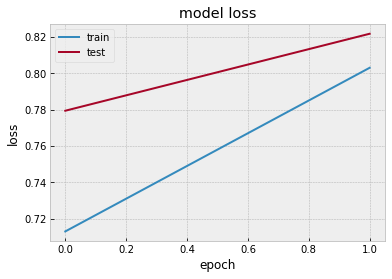

In [8]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [36]:
movie_df =df[['movieId','title']]
# Let us get a user and see the top recommendations.
user_id = df.userId.sample(1).iloc[0]
movies_watched_by_user = df[df.userId == user_id]
movies_not_watched = movie_df[
    ~movie_df["movieId"].isin(movies_watched_by_user.movieId.values)
]["movieId"]
movies_not_watched = list(
    set(movies_not_watched).intersection(set(movie2movie_encoded.keys()))
)
movies_not_watched = [[movie2movie_encoded.get(x)] for x in movies_not_watched]
user_encoder = user2user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movies_not_watched), movies_not_watched)
)
ratings = model.predict(user_movie_array).flatten()
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded2movie.get(movies_not_watched[x][0]) for x in top_ratings_indices
]

print("Showing recommendations for user: {}".format(user_id))
print("====" * 9)
print("Movies with high ratings from user")
print("----" * 8)
top_movies_user = (
    movies_watched_by_user.sort_values(by="rating", ascending=False)
    .head(5)
    .movieId.values
)
movie_df_rows = movie_df[movie_df["movieId"].isin(top_movies_user)]
for row in movie_df_rows.itertuples():
    print(row.title)
#,'with a ranking of:',movies_watched_by_user[movies_watched_by_user['movieId']==row.movieId]['rating']
print("----" * 8)
print("Top 10 movie recommendations")
print("----" * 8)
recommended_movies = movie_df[movie_df["movieId"].isin(recommended_movie_ids)]
for row in recommended_movies.itertuples():
    print(row.title)

Showing recommendations for user: 266965
Movies with high ratings from user
--------------------------------
Princess Bride, The (1987)
Princess Bride, The (1987)
Bourne Identity, The (2002)
Bourne Identity, The (2002)
Bourne Identity, The (2002)
Princess Bride, The (1987)
Princess Bride, The (1987)
Garden State (2004)
Princess Bride, The (1987)
Princess Bride, The (1987)
Princess Bride, The (1987)
Bourne Identity, The (2002)
Bourne Identity, The (2002)
Bourne Identity, The (2002)
Princess Bride, The (1987)
Princess Bride, The (1987)
Princess Bride, The (1987)
Bourne Identity, The (2002)
Bourne Identity, The (2002)
Bourne Identity, The (2002)
Princess Bride, The (1987)
Garden State (2004)
Bourne Identity, The (2002)
Princess Bride, The (1987)
Princess Bride, The (1987)
Princess Bride, The (1987)
Ender's Game (2013)
Princess Bride, The (1987)
Bourne Identity, The (2002)
Bourne Identity, The (2002)
Princess Bride, The (1987)
Princess Bride, The (1987)
Princess Bride, The (1987)
Garden St

# Conclusión

En el presente proyecto se puede observar lo complejo que es realizar recomendaciones, ya que esta actividad no corresponde a una ciencia cierta, ya que no es raro que nos encontremos con una película muy recomendada que no sea de nuestro gusto para nada, o, al contrario, existen situaciones en que una película que muchas personas nos decía ser horrible, termina gustándonos.
Cada vez es más masivo el negocio del entretenimiento en streaming, la competencia es feroz, incluso existen líneas de celulares que lanzaron sus servicios de streaming. Por lo cual, estas compañías están siempre buscando la mejor forma para retener a sus clientes y atraer nuevos clientes.  Bajo esta motivación los algoritmos de recomendación se hacen cada vez más necesarios.

Se utilizó el algoritmo más común que es por popularidad, por su simplicidad es muy usado, sobre todo en páginas web de contenido con menos recursos y conocimientos en Machine Learning. Nos permite evaluar las películas según qué tan populares son, equilibrando la puntuación y la cantidad de puntuaciones que ha recibido. Este modelo es muy básico y poco preciso, ya que no genera recomendaciones personalizadas.

Posterior a ello se desarrolló el algoritmo ALS, el cual generó muy buenos resultados, aunque sucedía que antes de limitar que una película debía estar al menos 30 veces evaluada para ser considerada, este algoritmo tendía a recomendar películas poco reproducidas y de mala calidad. Por esto se tomó la decisión de aumentar este requerimiento, que permitió mejorar considerablemente el modelo. Si bien tiene métricas bastante bajas, es importante controlar su desempeño y probar los resultados.

El algoritmo KNN nos compara nuestros gustos con las K personas más similares y a partir de ello realiza la recomendación. Tiene como ventaja la simplicidad, pero no se consiguió poder utilizar más de 3 millones de datos, debido a que la matriz utilizada para la predicción coloca a los usuarios en las columnas y las películas en las filas, ya que el problema del KNN funciona bien con muestras más pequeñas.

Y finalmente el Colaborative Filtering que obtuvo un RMSE menor que el obtenido en el uso del ALS, siendo que ocupa menos datos que el ALS, utilizando únicamente los usuarios, las películas y las calificaciones. Dado a la métrica del RMSE seleccionamos el mejor modelo y validamos el modelo a distintos usurarios, cuyos resultados se aprecian en el Anexo.

Podemos señalar que se considera el mejor modelo al filtro colaborativo, que fue el que generó mejores resultados con un tiempo de ejecución relativamente bajo. Aunque en situaciones con bajo o nulo número de datos, se recomienda el uso del modelo de popularidad. Y en caso de que una persona se encuentre en búsqueda de una película similar a la que le gusta se recomienda el uso de KNN, ya que simplifica bastante la búsqueda, y es fácilmente actualizable.
